# <font color='crimson'>Case Study - Wine Quality Prediction</font>

# <font color='crimson'>Import all necessary modules and load the data</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,precision_score,recall_score,accuracy_score,f1_score,roc_auc_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## <font color='crimson'>Data Reading</font>

In [2]:
wine = pd.read_csv('winequality_red.csv')
wine.shape

(1599, 12)

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## <font color='crimson'>Data Info</font>

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## <font color='crimson'>Null value Checking</font>

In [6]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## <font color='crimson'>Dependent variable Analysis</font>

In [7]:
wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## <font color='crimson'>Reduction of dependent variable classes</font>

In [8]:
wine.quality =wine.quality.replace(3,6)
wine.quality =wine.quality.replace(8,5)
wine.quality =wine.quality.replace(4,5)
wine.quality =wine.quality.replace(7,6)

wine.quality.value_counts().to_frame()

,quality
6,847
5,752


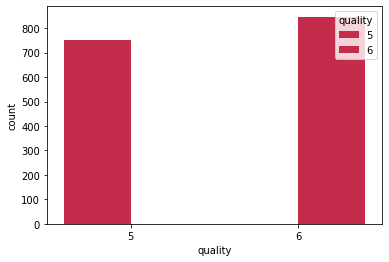

In [9]:
sns.countplot(x='quality',hue='quality',palette=['crimson'],data=wine)
plt.title="wine quality distribution"
plt.show()

In [10]:
wine.quality =wine.quality.astype('str')

## <font color='crimson'>Univariate Analysis</font>

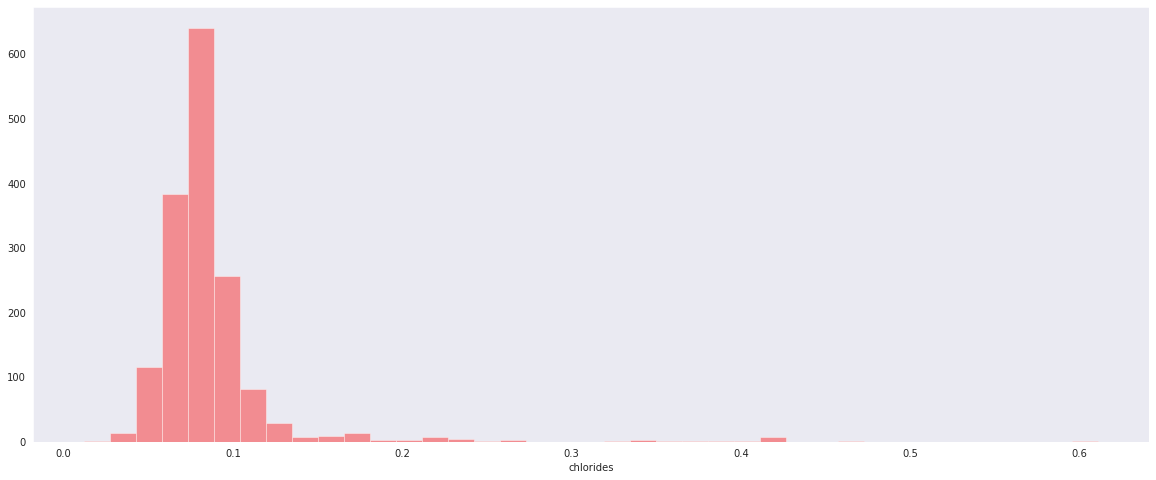

In [11]:
plt.figure(figsize=(20,8))
sns.set_style("dark")
sns.distplot(wine.chlorides,kde=False, bins=int(np.sqrt(1599)),color="r")
plt.show()


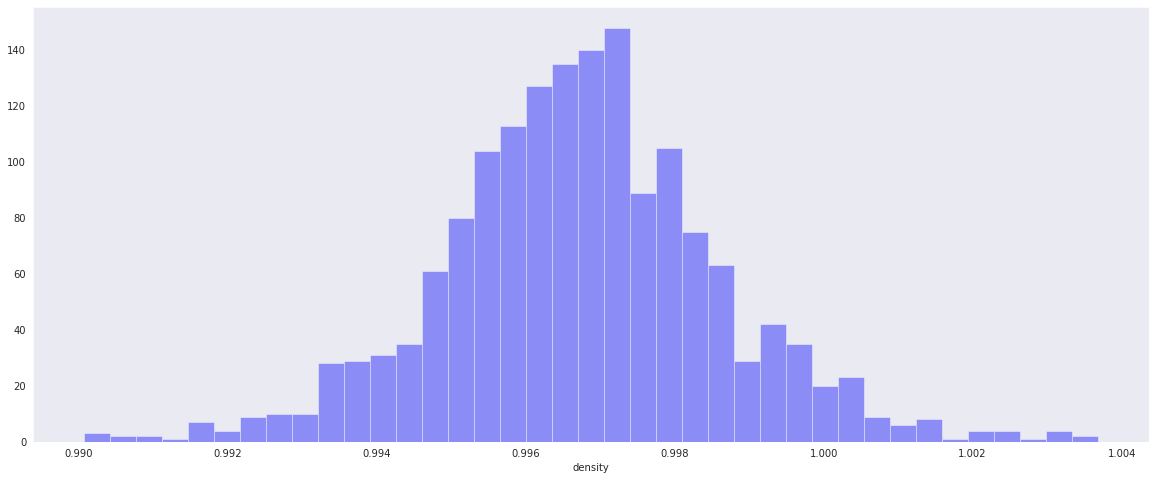

In [12]:
plt.figure(figsize=(20,8))
sns.set_style("dark")
sns.distplot(wine.density,kde=False, bins=int(np.sqrt(1599)),color="b")
plt.show()


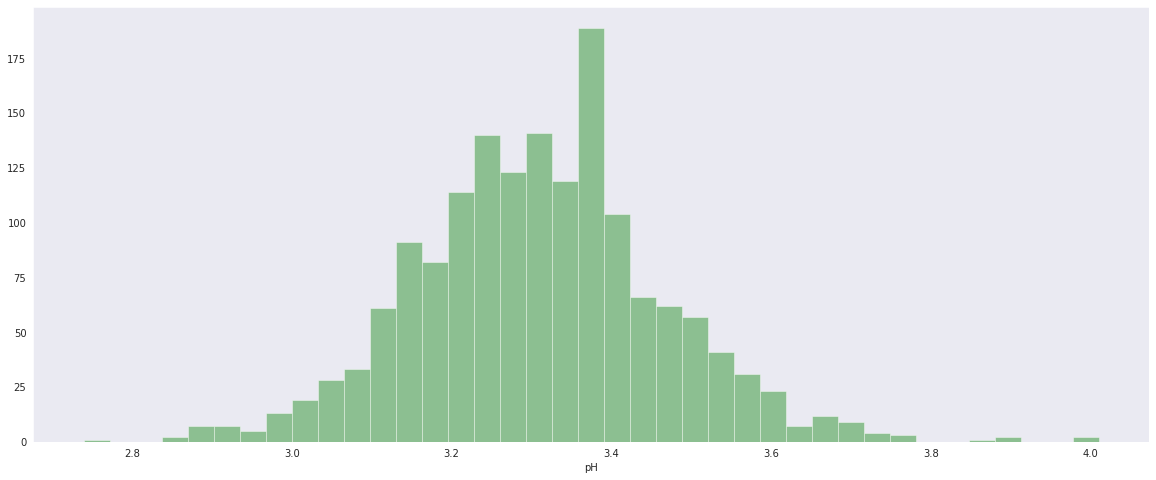

In [13]:
plt.figure(figsize=(20,8))
sns.set_style("dark")
sns.distplot(wine.pH,kde=False, bins=int(np.sqrt(1599)),color="g")
plt.show()


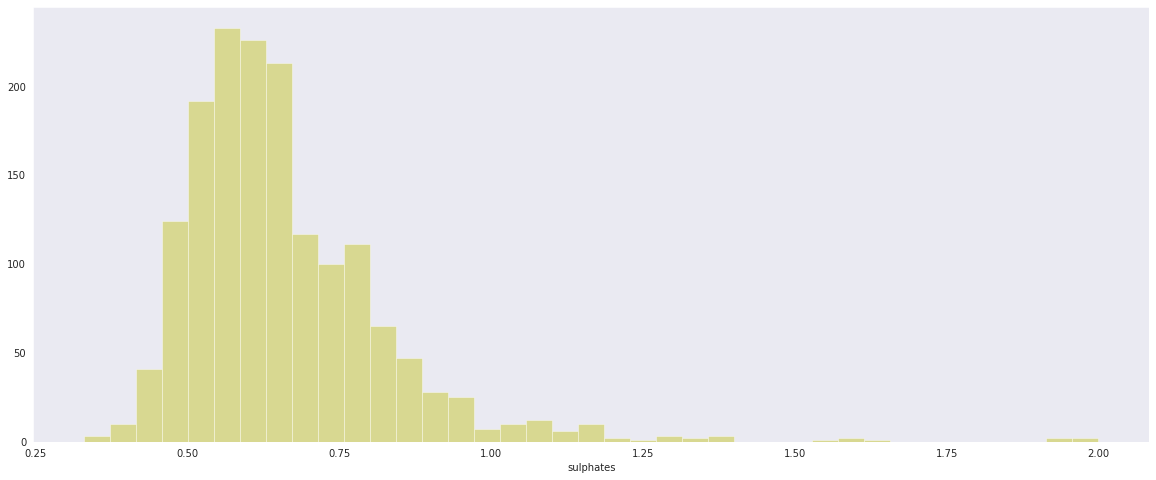

In [14]:
plt.figure(figsize=(20,8))
sns.set_style("dark")
sns.distplot(wine.sulphates,kde=False, bins=int(np.sqrt(1599)),color="y")
plt.show()


## <font color='crimson'>Multivariate Analysis</font>

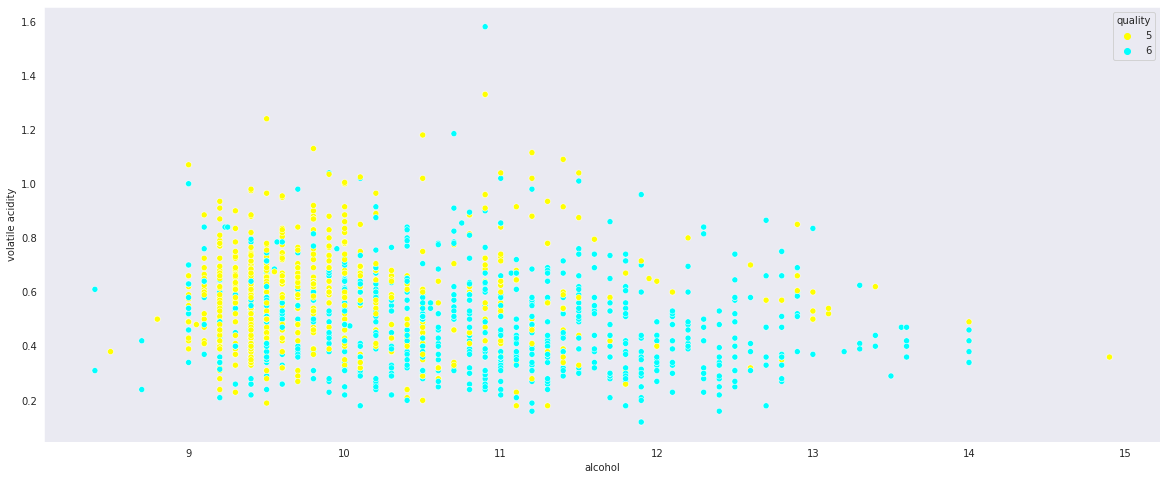

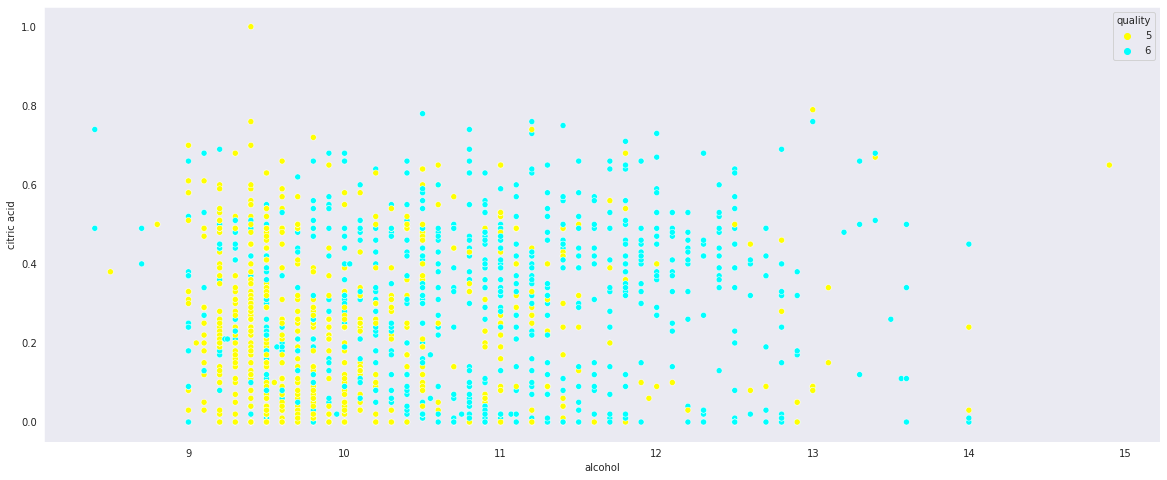

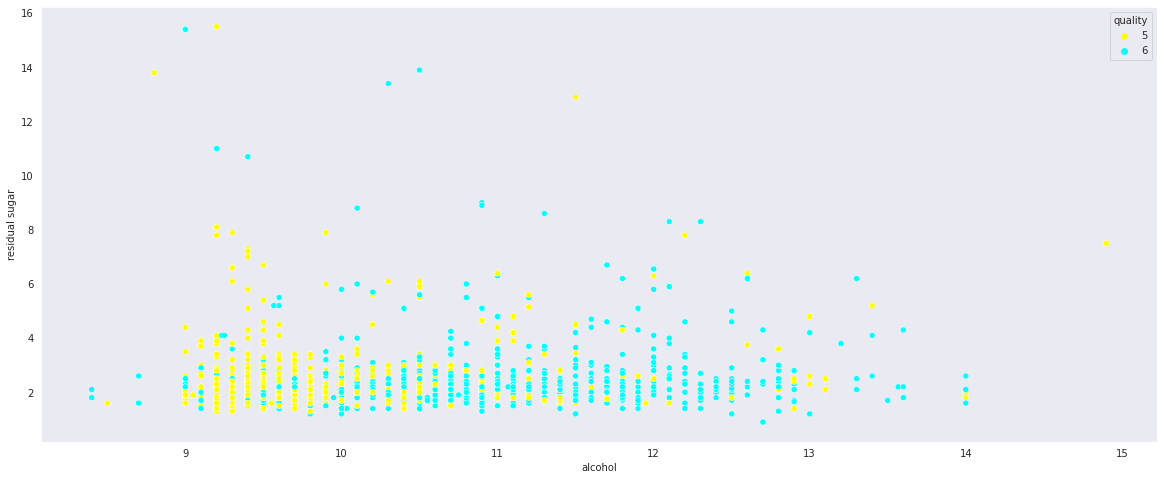

In [15]:
for i in ['volatile acidity','citric acid','residual sugar']:
    plt.figure(figsize=(20,8))
    sns.set_style("dark")
    sns.scatterplot(data=wine,y = i, x='alcohol',hue ='quality',palette=["yellow","cyan"])
    plt.show()

### PLOT:2

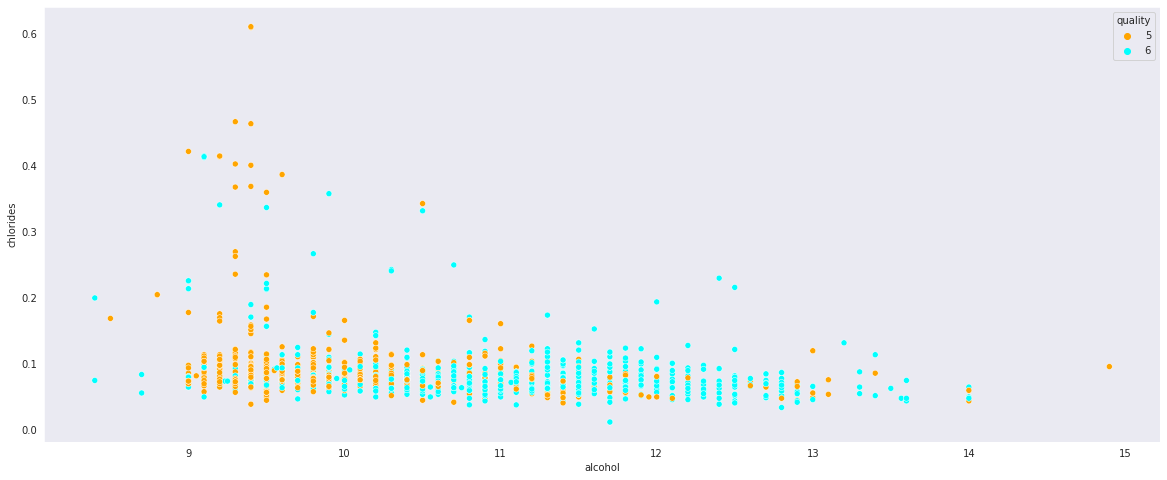

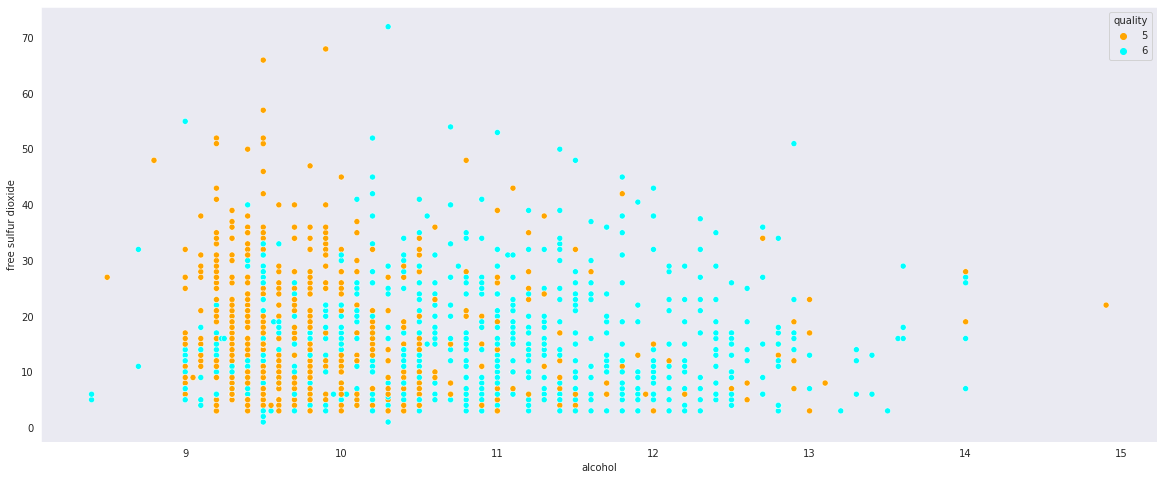

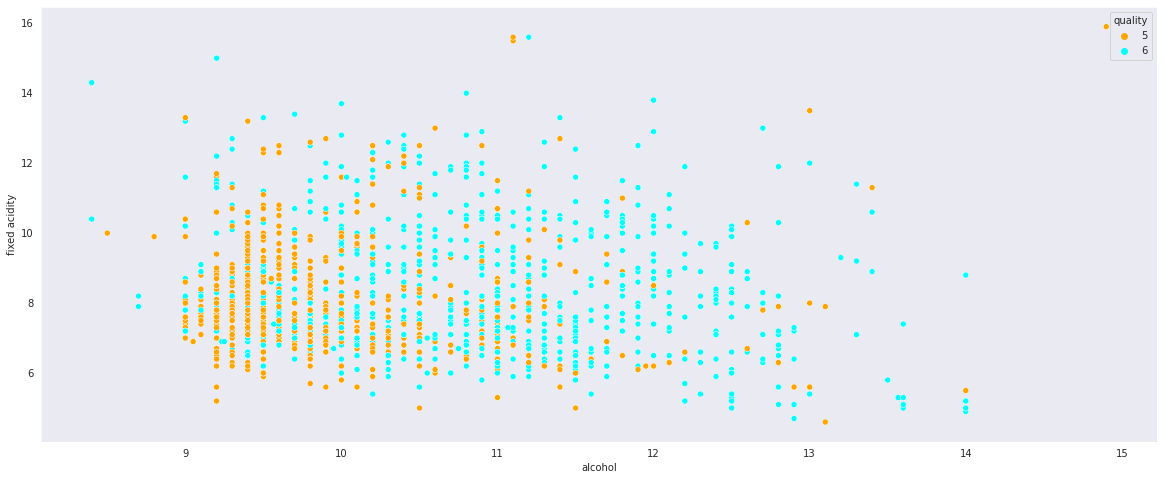

In [16]:
for i in ["chlorides","free sulfur dioxide","fixed acidity"]:
    plt.figure(figsize=(20,8))
    sns.set_style("dark")
    sns.scatterplot(data=wine,y = i, x='alcohol',hue ='quality',palette=["orange","cyan"])
    plt.show()

### PLOT:3

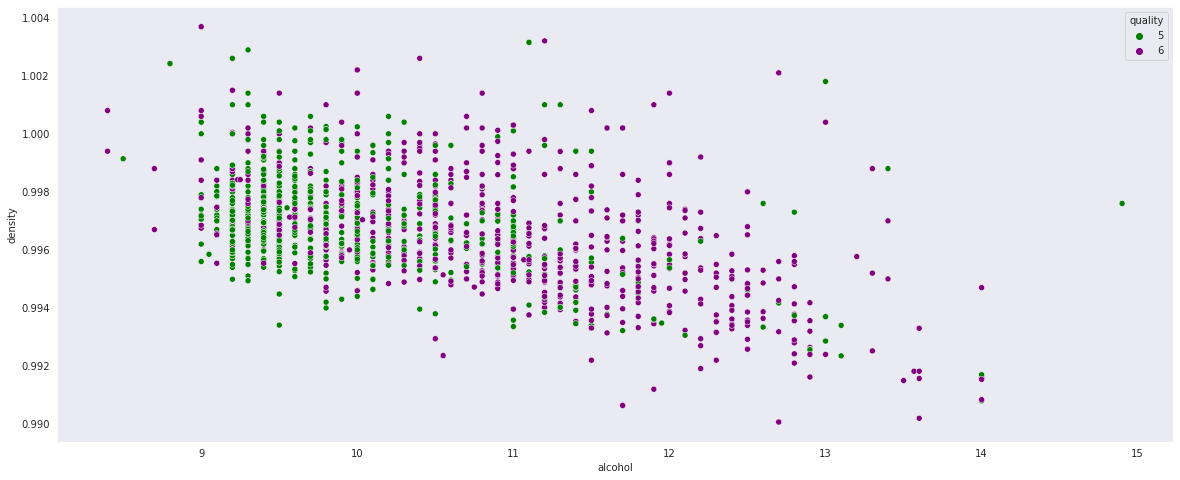

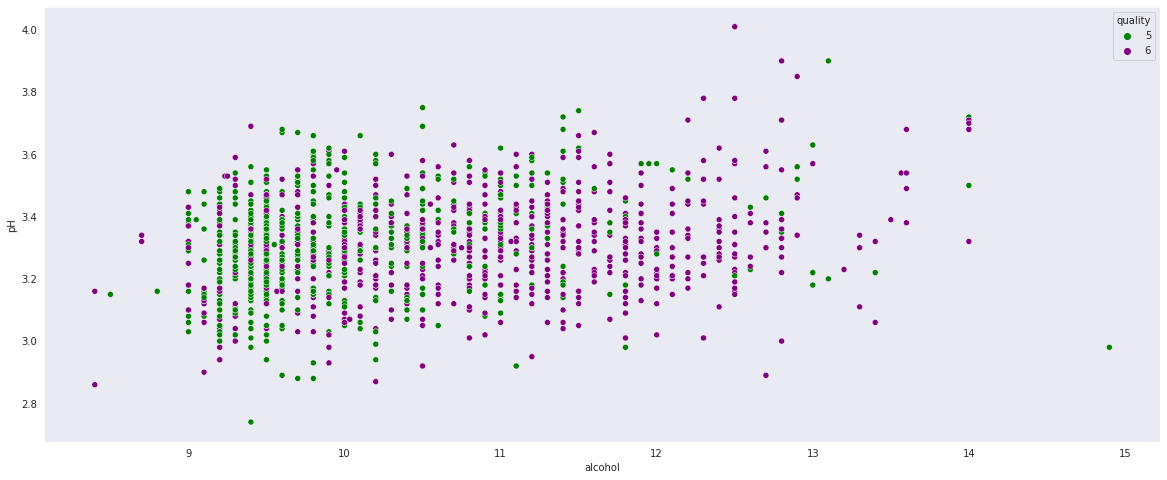

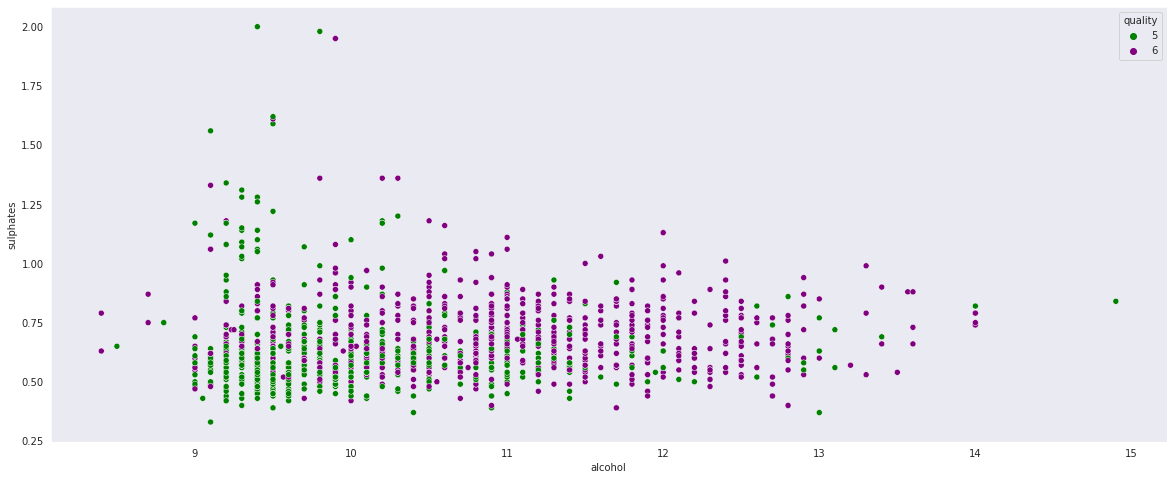

In [17]:
for i in ["density","pH","sulphates"]:
    plt.figure(figsize=(20,8))
    sns.set_style("dark")
    sns.scatterplot(data=wine,y = i, x='alcohol',hue ='quality',palette=["green","purple"])
    plt.show()


## Correlation Analysis

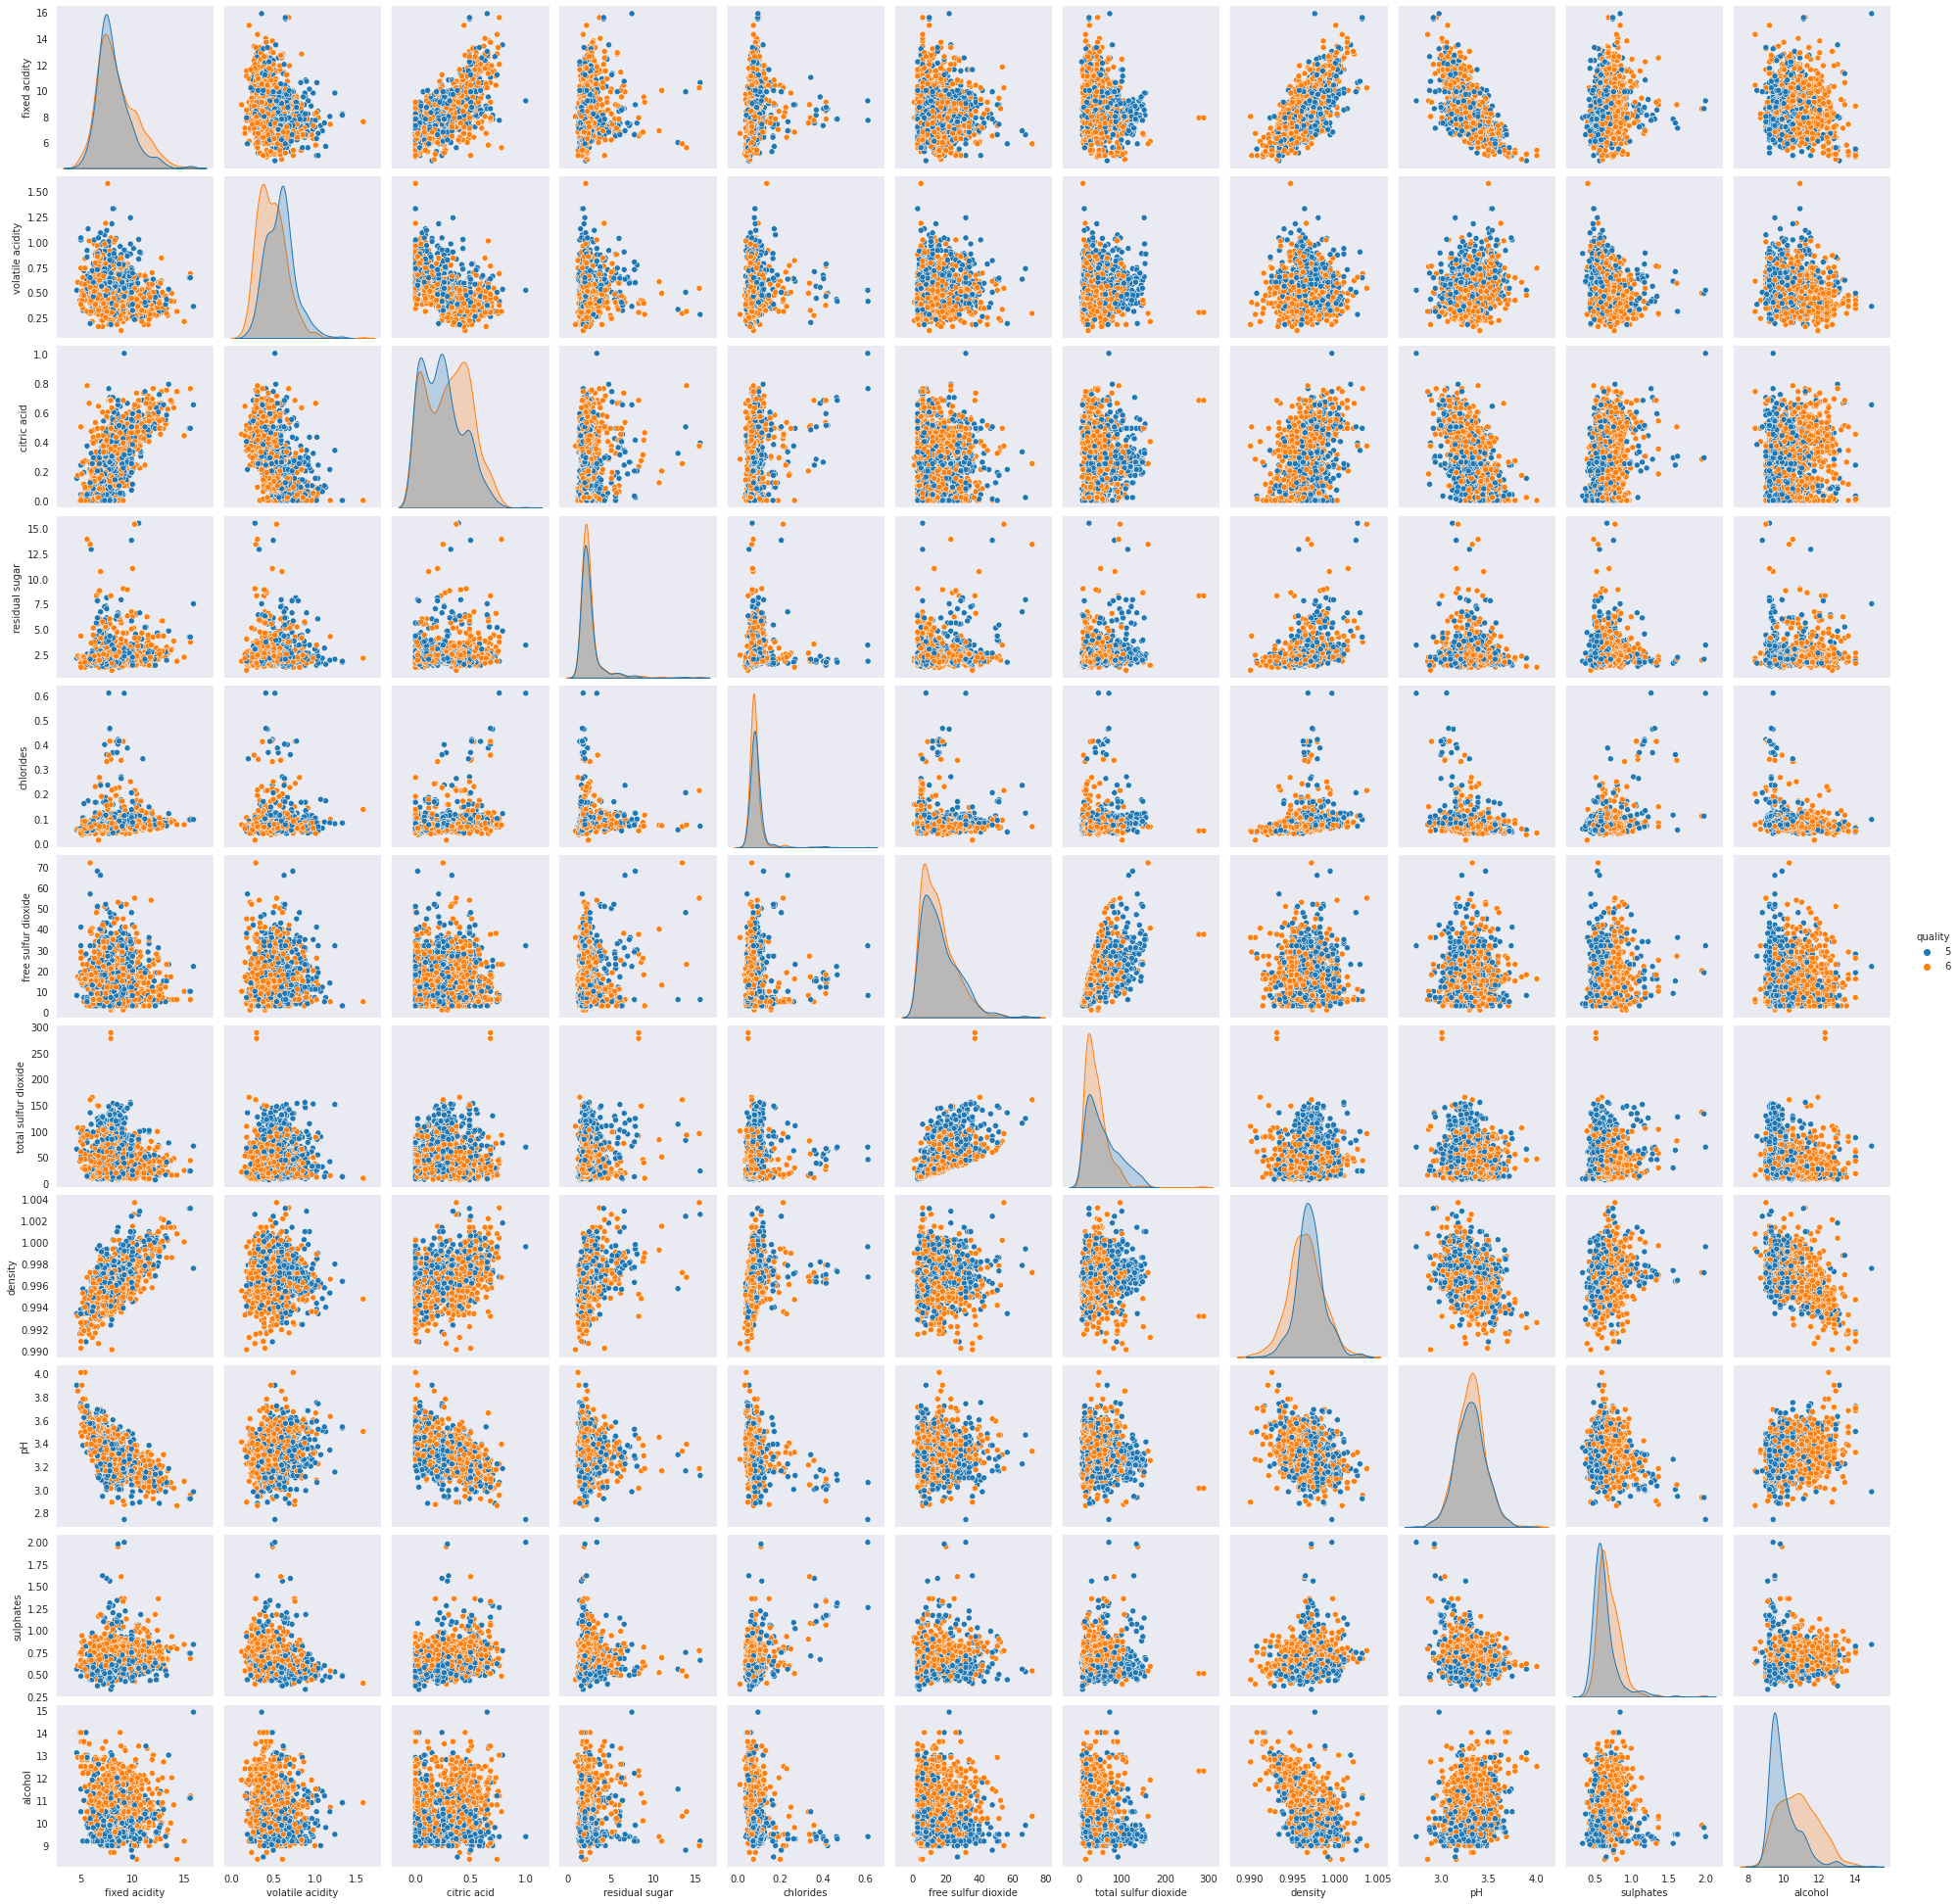

In [18]:
sns.pairplot(wine,hue='quality')
plt.show()

### Numerial Data Description

In [19]:
wine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


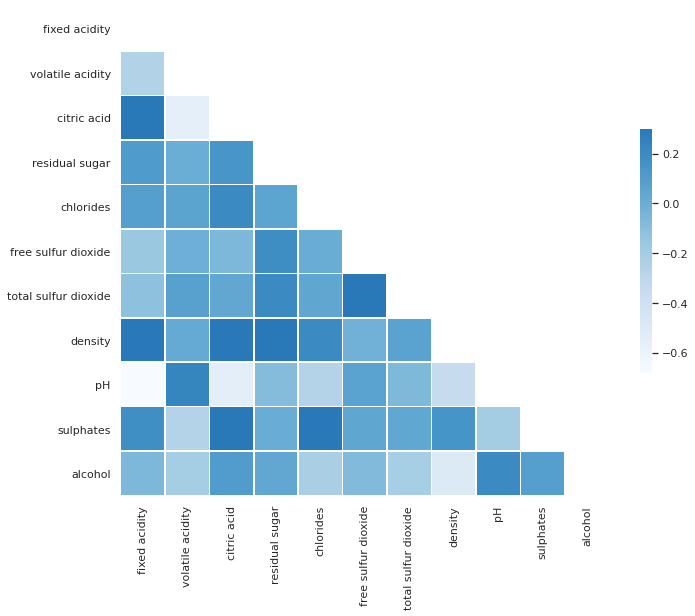

In [20]:
sns.set(style="white")
# Generate a large random dataset
d = wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
# Compute the correlation matrix
corr = d.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='Blues', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# <font color='crimson'>--------------------------Model Building--------------------------</font>

## Data Splitting

In [21]:
X = wine.drop(['quality'],axis=1)
Y = wine['quality'].values
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [22]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX_train = scaler.fit(X)
rescaledX_test = scaler.fit(X)

In [23]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# <font color='crimson'>Logistic</fot>

In [24]:
#X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
logreg =LogisticRegression(random_state=42, solver="lbfgs",penalty='l2',C=2,class_weight='balanced')
logreg.fit(X_train,y_train)

y_predict = logreg.predict(X_test)

confusion_matrix(y_test,y_predict)
print()

training_accuracy = logreg.score(X_train,y_train)
print('training_accuracy:',training_accuracy)

testing_accuracy = logreg.score(X_test,y_test)
print('testing_accuracy:',testing_accuracy)



training_accuracy: 0.7381590705987489
testing_accuracy: 0.7125


# <font color='crimson'>Decision Tree</font>

In [25]:
#X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=10,
                                  min_samples_leaf=3, splitter='best',class_weight='balanced')
dt_model.fit(X_train,y_train)
y_pred_dt = dt_model.predict(X_test)

print("Trainig accuracy",dt_model.score(X_train,y_train))  
print()
print("Testing accuracy",dt_model.score(X_test, y_test))
print()

Trainig accuracy 0.9016979445933869

Testing accuracy 0.6895833333333333



# <font color='crimson'>Random Forest</font>

In [31]:
#X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
rf_model = RandomForestClassifier(criterion='entropy',random_state=42,max_depth=7,max_features=None,
                                  min_samples_leaf=4,min_samples_split=6,
                                  n_estimators=1000,oob_score=True,class_weight='balanced')
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)
print("Trainig accuracy",rf_model.score(X_train,y_train))  
print()
print("Testing accuracy",rf_model.score(X_test, y_test))
print()

Trainig accuracy 0.871313672922252

Testing accuracy 0.75



# <font color='crimson'>Gradient Boosting</font>

In [27]:
#X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
g_boost_model = GradientBoostingClassifier(random_state=42)
g_boost_model.fit(X_train,y_train)
y_pred_g_boost = g_boost_model.predict(X_test)
print("Trainig accuracy",g_boost_model.score(X_train,y_train))  
print()
print("Testing accuracy",g_boost_model.score(X_test, y_test))


Trainig accuracy 0.870420017873101

Testing accuracy 0.7666666666666667


# <font color='crimson'>Ad Boosting</font>

In [28]:
#X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
AdaBoost_model = AdaBoostClassifier(random_state=42)
AdaBoost_model.fit(X_train,y_train)
y_pred_Ada = AdaBoost_model.predict(X_test)


print("Trainig accuracy",AdaBoost_model.score(X_train,y_train))  
print()
print("Testing accuracy",AdaBoost_model.score(X_test, y_test))


Trainig accuracy 0.7810545129579982

Testing accuracy 0.7125


# <font color='crimson'>XG Boost</font>

In [29]:
#X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
xg_boost_model = XGBClassifier(random_state=42,max_depth=2,eta=0.7,subsample=0.9,
                              alpha=0.7,nthrrad=5,silent=1,num_round=5,
                              scale_pos_weight=2,
                              learning_rate=0.9,
                              colsample_bytree = 0.4,n_estimator=100
                              ,class_weight= 'balanced')
xg_boost_model.fit(X_train,y_train)

y_pred_xg_boost = g_boost_model.predict(X_test)


print("Trainig accuracy",xg_boost_model.score(X_train,y_train))  
print()
print("Testing accuracy",xg_boost_model.score(X_test, y_test))
print()

[16:52:04] WARNING: /workspace/src/learner.cc:480: 
Parameters: { class_weight, n_estimator, nthrrad, num_round, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Trainig accuracy 0.9124218051831993

Testing accuracy 0.7583333333333333



# <font color='crimson'>Bagging</font>

In [30]:
#X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
Bag_model = BaggingClassifier(n_estimators=40,max_features=6,max_samples=50,random_state=42,
                             bootstrap=True,oob_score=False,bootstrap_features=False)
Bag_model.fit(X_train,y_train)


y_pred_bag = Bag_model.predict(X_test)


print("Trainig accuracy",Bag_model.score(X_train,y_train))  
print()
print("Testing accuracy",Bag_model.score(X_test, y_test))
print()

Trainig accuracy 0.7685433422698839

Testing accuracy 0.73125



# <font color='crimson'>SVM</font>

In [32]:
#X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
svm_model = SVC(gamma='auto')
svm_model.fit(X_train,y_train)
svmpred_rf = svm_model.predict(X_test)
print("Trainig accuracy",svm_model.score(X_train,y_train))  
print()
print("Testing accuracy",svm_model.score(X_test, y_test))
print()

Trainig accuracy 0.8471849865951743

Testing accuracy 0.6666666666666666



# <font color='crimson'>Models Compilation</font>

In [33]:
algo = []
tr = []
te=[]

In [34]:
#Base Models

#Logistic Regrssion
model = LogisticRegression(random_state=42,class_weight='balanced')
model.fit(X_train,y_train)
algo.append('Logistic Regression')
tr.append(model.score(X_train,y_train))
te.append(model.score(X_test,y_test))

#Decision Tree
model = DecisionTreeClassifier(random_state=42,class_weight='balanced')
model.fit(X_train,y_train)
algo.append('Decision Tree')
tr.append(model.score(X_train,y_train))
te.append(model.score(X_test,y_test))

#RandomForest
model = RandomForestClassifier(random_state=42,class_weight='balanced')
model.fit(X_train,y_train)
algo.append('Random Forest')
tr.append(model.score(X_train,y_train))
te.append(model.score(X_test,y_test))

#Ada Boosting
model =AdaBoostClassifier(random_state=42)
model.fit(X_train,y_train)
algo.append('Ad Boosting')
tr.append(model.score(X_train,y_train))
te.append(model.score(X_test,y_test))

#Gradient Boosting
model =GradientBoostingClassifier(random_state=42)
model.fit(X_train,y_train)
algo.append('Gradient Boosting')
tr.append(model.score(X_train,y_train))
te.append(model.score(X_test,y_test))

#XG Boost
model =XGBClassifier(random_state=42,class_weight= 'balanced')
model.fit(X_train,y_train)
algo.append('XG Boost')
tr.append(model.score(X_train,y_train))
te.append(model.score(X_test,y_test))

#Bagging
model =BaggingClassifier(random_state=42)
model.fit(X_train,y_train)
algo.append('Bagging')
tr.append(model.score(X_train,y_train))
te.append(model.score(X_test,y_test))

#SupportVector
model = SVC(gamma='auto')
model.fit(X_train,y_train)
algo.append('Support Vector')
tr.append(model.score(X_train,y_train))
te.append(model.score(X_test,y_test))

results=pd.DataFrame()
results['Model Name']=algo
results['Training Score'] =tr
results['Test Score'] =te
results=results.set_index('Model Name')


[16:55:02] WARNING: /workspace/src/learner.cc:480: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [35]:
#Base Models

#Logistic Regrssion
model = LogisticRegression(random_state=42, solver="lbfgs",penalty='l2',C=2,class_weight='balanced')
model.fit(X_train,y_train)
algo.append('Logistic Regression')
tr.append(model.score(X_train,y_train))
te.append(model.score(X_test,y_test))


#Decision Tree
model = DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=42,
                                  min_samples_leaf=3, splitter='best',class_weight='balanced')
model.fit(X_train,y_train)
algo.append('Decision Tree')
tr.append(model.score(X_train,y_train))
te.append(model.score(X_test,y_test))

#RandomForest
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
model = RandomForestClassifier(criterion='entropy',random_state=42,max_depth=7,max_features=None,
                                  min_samples_leaf=4,min_samples_split=6,
                                  n_estimators=1000,oob_score=True,class_weight='balanced')
model.fit(X_train,y_train)
algo.append('Random Forest')
tr.append(model.score(X_train,y_train))
te.append(model.score(X_test,y_test))


#Ada Boosting
model =AdaBoostClassifier(random_state=42)
model.fit(X_train,y_train)
algo.append('Ad Boosting')
tr.append(model.score(X_train,y_train))
te.append(model.score(X_test,y_test))

#Gradient Boosting
model =GradientBoostingClassifier(random_state=42)
model.fit(X_train,y_train)
algo.append('Gradient Boosting')
tr.append(model.score(X_train,y_train))
te.append(model.score(X_test,y_test))


#XG Boost
model =XGBClassifier(random_state=42,max_depth=2,eta=0.7,subsample=0.9,
                              alpha=0.7,nthrrad=5,silent=1,num_round=5,
                              scale_pos_weight=2,
                              learning_rate=0.9,
                              colsample_bytree = 0.4,n_estimator=100
                              ,class_weight= 'balanced')
model.fit(X_train,y_train)
algo.append('XG Boost')
tr.append(model.score(X_train,y_train))
te.append(model.score(X_test,y_test))


#Bagging
model =BaggingClassifier(n_estimators=40,max_features=6,max_samples=50,random_state=42,
                             bootstrap=True,oob_score=False,bootstrap_features=False)
model.fit(X_train,y_train)
algo.append('Bagging')
tr.append(model.score(X_train,y_train))
te.append(model.score(X_test,y_test))

#SupportVector
model = SVC(gamma='auto')
model.fit(X_train,y_train)
algo.append('Support Vector')
tr.append(model.score(X_train,y_train))
te.append(model.score(X_test,y_test))

results=pd.DataFrame()
results['Model Name']=algo
results['Training Score'] =tr
results['Test Score'] =te
results=results.set_index('Model Name')


[16:55:33] WARNING: /workspace/src/learner.cc:480: 
Parameters: { class_weight, n_estimator, nthrrad, num_round, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [36]:
results

,Training Score,Test Score
Model Name,,
Logistic Regression,0.736372,0.712500
Decision Tree,1.000000,0.743750
Random Forest,1.000000,0.785417
Ad Boosting,0.781055,0.712500
Gradient Boosting,0.870420,0.766667
XG Boost,1.000000,0.785417
Bagging,0.989276,0.747917
Support Vector,0.847185,0.666667
Logistic Regression,0.738159,0.712500


In [39]:
Wine_Model_Type =['Base Models','Base Models','Base Models','Base Models','Base Models','Base Models','Base Models','Base Models',
           'Tunned Model','Tunned Model','Tunned Model','Tunned Model','Base Models','Base Models','Tunned Model','Tunned Model']
results['Wine_Model_Type']=Wine_Model_Type
Review = ['Average','Over Fitted','Over Fitted','Average','Good','Over Fitted','Over Fitted',
         'Average','Over Fitted','Good','Average','Good','Over Fitted','Average','Over Fitted','Average']
results['Review'] = Review

In [40]:
results = results.reset_index()
results = results.set_index('Wine_Model_Type')

In [41]:
def color_negative_red(value):
  """
  Colors elements in a dateframe
  green if positive and red if
  negative. Does not color NaN
  values.
  """

  if value >= 0.8:
    color = 'green'
  else:
    color = 'red'

  return 'color: %s' % color

In [42]:
#results.style.applymap(color_negative_red, subset=['Training Score','Test Score'])
results = results.reset_index(drop=False).style.applymap(color_negative_red,subset=['Training Score','Test Score'])
results

,Wine_Model_Type,Model Name,Training Score,Test Score,Review
0,Base Models,Logistic Regression,0.736372,0.712500,Average
1,Base Models,Decision Tree,1.000000,0.743750,Over Fitted
2,Base Models,Random Forest,1.000000,0.785417,Over Fitted
3,Base Models,Ad Boosting,0.781055,0.712500,Average
4,Base Models,Gradient Boosting,0.870420,0.766667,Good
5,Base Models,XG Boost,1.000000,0.785417,Over Fitted
6,Base Models,Bagging,0.989276,0.747917,Over Fitted
7,Base Models,Support Vector,0.847185,0.666667,Average
8,Tunned Model,Logistic Regression,0.738159,0.712500,Over Fitted
9,Tunned Model,Decision Tree,0.901698,0.689583,Good
